# Exploratory Data Analysis - EDA
Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it.  

# Steps
1. Data Collection
2. Data Preparation and cleaning
3. Univariate and Bivarient Analysis
4. Data Visualization
5. Summarize the inference and write a conclusion

# Data Collection
1. Get your data

  a. goto [kaggle.com](https://www.kaggle.com/datasets)

  b. find a dataset.

  c. Download if for your use.

NOTE:  Here we have used  [US Accident Dataset](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)



# Download data from Kaggle to Colab
* Install Kaggle library
```
! pip install kaggle
```

* Kaggle API Key generation
  * Goto kaggle.com
  * login
  * profile
  * your profile
  * account
  * create new API token
  * save kaggle.json
  * upload kaggle.json to colab



In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [26]:
! cp kaggle.json ~/.kaggle/

In [27]:
! chmod 600 ~/.kaggle/kaggle.json

In [28]:
! ls -l ~/.kaggle/

total 4
-rw------- 1 root root 71 Mar 25 12:55 kaggle.json


In [30]:
! kaggle datasets download sobhanmoosavi/us-accidents

 93% 251M/269M [00:02<00:00, 126MB/s]
100% 269M/269M [00:02<00:00, 118MB/s]


In [31]:
!unzip  /content/us-accidents.zip -d /content/ 

Archive:  /content/us-accidents.zip
  inflating: /content/US_Accidents_Dec21_updated.csv  


# Import Library

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [33]:
data_filename = '/content/US_Accidents_Dec21_updated.csv'

In [34]:
df = pd.read_csv(data_filename)

In [ ]:
df.head(2)

In [ ]:
# Setting options to display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df.head(2)

# Dataset Description and stats

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

# Missing Value Analysis

In [ ]:
df.isna().sum()

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:
missing_value=df.isna().sum().sort_values(ascending=False)/len(df)
missing_value

In [ ]:
missing_value[missing_value!=0]

<Axes: >

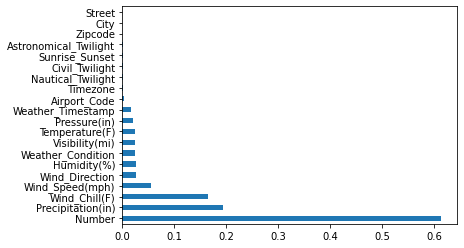

In [49]:
missing_value[missing_value!=0].plot(kind='barh')

In [50]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [51]:
df.drop(['Precipitation(in)', 'Number', 'Wind_Chill(F)'], axis=1, inplace=True)

In [53]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


# Exploratory Analysis and Visualization
Columns-
* City
* Start Time
* Start Lat, Start Lng
* Temperature
* Weather Condition
* Visibility

## City

In [56]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [57]:
len(df.City.unique())

11682

In [59]:
len(df.County.unique())

1707

In [60]:
len(df.State.unique())

49

In [ ]:
acct_per_city=df.City.value_counts()
acct_per_city

In [67]:
# more then 10000 recorded accident
len(acct_per_city[acct_per_city>=10000])

34

In [ ]:
acct_per_city[acct_per_city>=10000].plot(kind='barh')

In [70]:
acct_per_city[:5]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Name: City, dtype: int64

In [65]:
# atleast one recorded accident
len(acct_per_city[acct_per_city==1])

1110

In [73]:
#State wise accident
acct_per_state=df.State.value_counts()
acct_per_state[:5]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

In [74]:
#County wise accident
acct_per_County=df.County.value_counts()
acct_per_County[:5]

Los Angeles       234122
Miami-Dade        143939
Orange            114917
San Bernardino     55018
Dallas             50050
Name: County, dtype: int64

# Start Time

In [77]:
df.Start_Time[:3]
# YYYY-MM-DD hh:mm:ss

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
Name: Start_Time, dtype: object

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[:3]

In [84]:
df.Start_Time.dt.hour[:3]

0    0
1    5
2    6
Name: Start_Time, dtype: int64

<ipython-input-94-cecb2f6b7498>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

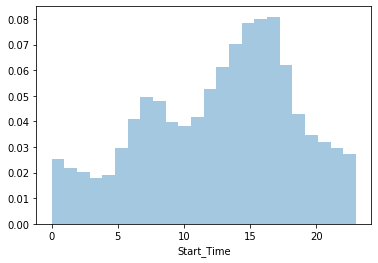

In [94]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

<ipython-input-95-019c7ea578c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

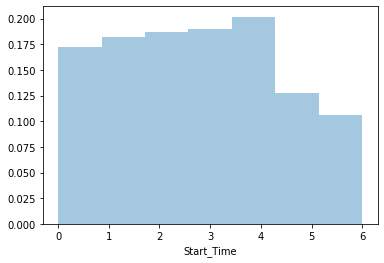

In [95]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

<ipython-input-91-f0025b057dc7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

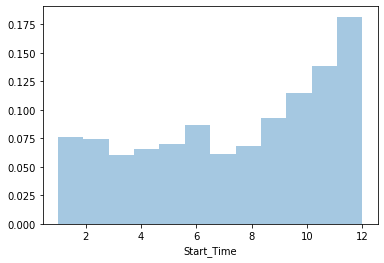

In [91]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

# Visibility and weather COndition

In [97]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [108]:
weather_data=df.Weather_Condition.value_counts().sort_values(ascending=False)

In [109]:
weather_data[:5]

Fair             1107194
Mostly Cloudy     363959
Cloudy            348767
Partly Cloudy     249939
Clear             173823
Name: Weather_Condition, dtype: int64

In [112]:
visibility_data=df['Visibility(mi)'].value_counts().sort_values(ascending=False)

In [ ]:
visibility_data

In [115]:
df['Visibility(mi)'].max()

140.0

In [116]:
df['Visibility(mi)'].min()

0.0

# Start Lat and lng

In [ ]:
df.head(3)

In [121]:
df.Start_Lat[:3], df.Start_Lng[:3]

(0    40.10891
 1    39.86542
 2    39.10266
 Name: Start_Lat, dtype: float64, 0   -83.09286
 1   -84.06280
 2   -84.52468
 Name: Start_Lng, dtype: float64)

In [162]:
sample_df=df.sample(frac=0.001)
len(sample_df)

2845

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

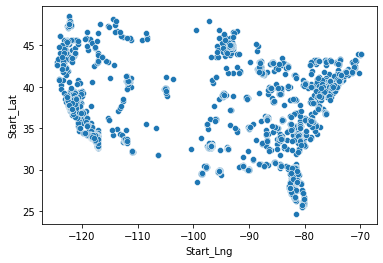

In [163]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, data=sample_df)

In [164]:
import folium

In [144]:
lat, lng=df.Start_Lat[0], df.Start_Lng[0]
lat, lng

(40.10891, -83.09286)

In [ ]:
m = folium.Map(location=[lat, lng], zoom_start=2)
folium.Marker(
    [lat, lng]

).add_to(m)
m

In [ ]:
list(sample_df.Start_Lat)

In [ ]:
list(sample_df.Start_Lng)

In [ ]:
lat_lng_data=list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
lat_lng_data

In [166]:
from folium.plugins import HeatMap

In [ ]:
map=folium.Map()
HeatMap(lat_lng_data).add_to(map)
map

# Summary and Conlusion
1. Wind_chill, Precipitation, Number has more then 10% missing value.
2. Top 5 cities with accident 

  Miami          106966

  Los Angeles     68956

  Orlando         54691

  Dallas          41979

  Houston         39448